In [59]:
import numpy as np

In [41]:
df = pd.read_csv('../datasets/employee_attrition.csv')
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


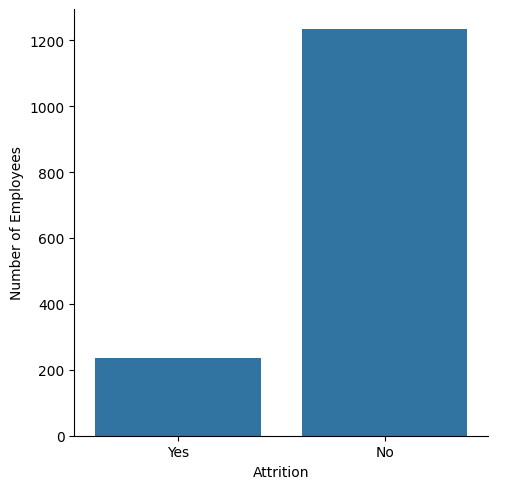

In [42]:
ax = sns.catplot(x = "Attrition", kind = "count", data = df);
ax.set(xlabel = 'Attrition', ylabel = 'Number of Employees')
plt.show()

In [43]:
missing_cols = df.columns[df.isnull().any()].values
print('The missing columns in the dataset are:', missing_cols)

The missing columns in the dataset are: []


In [44]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [45]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [46]:
df_numerical = pd.DataFrame(data = df.select_dtypes(include = ['int64']))
df_categorical = pd.DataFrame(data = df.select_dtypes(include = ['object']))
print('Number of numerical data columns: ', df_numerical.shape)
print('Number of categorical data columns: ', df_categorical.shape)

Number of numerical data columns:  (1470, 26)
Number of categorical data columns:  (1470, 9)


In [47]:
df_categorical = df_categorical.drop(['Attrition'], axis = 1)
df_categorical_encoded = pd.get_dummies(df_categorical)
df_categorical_encoded.head(5)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,False,False,True,False,False,True,False,True,False,False,...,False,False,True,False,False,False,True,True,False,True
1,False,True,False,False,True,False,False,True,False,False,...,False,True,False,False,False,True,False,True,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True
3,False,True,False,False,True,False,False,True,False,False,...,False,True,False,False,False,True,False,True,False,True
4,False,False,True,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,True,True,False


In [48]:
standard_scaler = StandardScaler()
df_numerical_scaled = standard_scaler.fit_transform(df_numerical)
df_numerical_scaled = pd.DataFrame(data = df_numerical_scaled, columns = df_numerical.columns, index = df_numerical.index)

In [49]:
print('Number of categorical columns after encoding: ', df_categorical_encoded.shape)
print('Number of numeric columns after scaling: ', df_numerical_scaled.shape)

Number of categorical columns after encoding:  (1470, 29)
Number of numeric columns after scaling:  (1470, 26)


In [50]:
df_final = pd.concat([df_numerical_scaled, df_categorical_encoded], axis = 1)
print('Number of columns after transformation: ', df_final.shape)

Number of columns after transformation:  (1470, 55)


In [51]:
target = df['Attrition']
map = {'Yes' : 1, 'No' : 0}
target = target.apply(lambda x: map[x])

print('Number of entries in the target column: ', target.shape)

Number of entries in the target column:  (1470,)


In [52]:
X = df_final
y = target

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0, stratify = y)
print('Shape of X train: ', X_train.shape)
print('Shape of X test: ', X_test.shape)
print('Shape of y train: ', y_train.shape)
print('Shape of y train: ', y_test.shape)

Shape of X train:  (1176, 55)
Shape of X test:  (294, 55)
Shape of y train:  (1176,)
Shape of y train:  (294,)


In [54]:
classifier = AdaBoostClassifier(n_estimators=200, random_state=1)

In [55]:
classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=1)

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
print('Accuracy of the model', accuracy_score(y_test, y_pred))

Accuracy of the model 0.8537414965986394


In [58]:
cm = confusion_matrix(y_test, y_pred)
print('The confusion matrix is: \n', cm)

The confusion matrix is: 
 [[234  13]
 [ 30  17]]
